In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import pmdarima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC-USD.csv')
bitcoin_df.head(5)

,Type,Date,Open,High,Low,Close,Adj Close,Volume
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970,777.943970,127605000.0
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029,771.155029,69547296.0
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009,773.872009,60557900.0
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012,758.700012,106363000.0
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999,764.223999,116218000.0


In [3]:
bitcoin_df.dtypes

Type          object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
del bitcoin_df['Volume']

In [5]:
bitcoin_df

,Type,Date,Open,High,Low,Close,Adj Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999,764.223999
...,...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130,57229.828130


In [6]:
del bitcoin_df["Adj Close"]
bitcoin_df

,Type,Date,Open,High,Low,Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130


In [7]:
bitcoin2_df = bitcoin_df.dropna(axis=0, how="any")

In [8]:
bitcoin2_df

,Type,Date,Open,High,Low,Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130


In [9]:
bitcoin2_df.sort_index(inplace=True)

In [10]:
bitcoin2_df['Date'] = pd.to_datetime(bitcoin2_df['Date'])

/Users/daniellamayoral/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
bitcoin2_df.head(5)

,Type,Date,Open,High,Low,Close
0,BTC,2016-12-02,757.544983,781.296021,757.544983,777.943970
1,BTC,2016-12-03,778.247986,778.247986,764.856018,771.155029
2,BTC,2016-12-04,771.638000,773.872009,768.161011,773.872009
3,BTC,2016-12-05,773.393982,773.468018,751.713013,758.700012
4,BTC,2016-12-06,758.719971,765.622009,758.719971,764.223999


In [12]:
bitcoin2_df.set_index('Date')

,Type,Open,High,Low,Close
Date,,,,,
2016-12-02,BTC,757.544983,781.296021,757.544983,777.943970
2016-12-03,BTC,778.247986,778.247986,764.856018,771.155029
2016-12-04,BTC,771.638000,773.872009,768.161011,773.872009
2016-12-05,BTC,773.393982,773.468018,751.713013,758.700012
2016-12-06,BTC,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...
2021-11-28,BTC,54813.023440,57393.843750,53576.734380,57248.457030
2021-11-29,BTC,57291.906250,58872.878910,56792.527340,57806.566410
2021-11-30,BTC,57830.113280,59113.402340,56057.281250,57005.425780


In [13]:
bitcoin3_df = bitcoin2_df.drop(columns=['Type','Open','High','Low'])

In [14]:
bitcoin3_df.set_index('Date')

,Close
Date,
2016-12-02,777.943970
2016-12-03,771.155029
2016-12-04,773.872009
2016-12-05,758.700012
2016-12-06,764.223999
...,...
2021-11-28,57248.457030
2021-11-29,57806.566410
2021-11-30,57005.425780


In [15]:
bitcoin3_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [16]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [17]:
#results = seasonal_decompose(bitcoin3_df['Close'],model ='multiplicative',period=365)
#plt.rcParams.update({'figure.figsize': (15,10)})
#results.plot()

In [30]:
#
results = seasonal_decompose(bitcoin3_df['Close'],model ='multiplicative',period=365)
observed = results.observed
seasonal = results.seasonal
residual = results.resid

df = pd.DataFrame({"observed":observed, "seasonal":seasonal,"residual":residual})
#df = pd.DataFrame({"observed":observed})

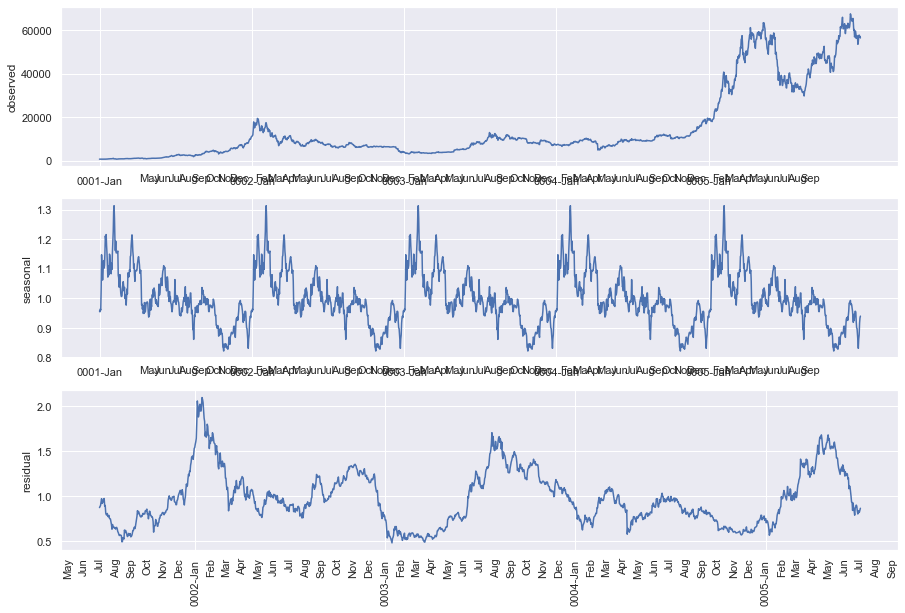

In [31]:
from matplotlib import dates as mdates
years = mdates.YearLocator()    # only print label for the years
months = mdates.MonthLocator()  # mark months as ticks
years_fmt = mdates.DateFormatter('%Y-%b')
fmt = mdates.DateFormatter('%b')

_, axes = plt.subplots(nrows=3,ncols=1, figsize=(15, 10))
for i, ax in enumerate(axes):
    ax = df.iloc[:,i].plot(ax=ax)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(fmt)
    ax.set_ylabel(df.iloc[:,i].name)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)